In [23]:
import sys
import copy
sys.path.insert(0, "../../")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom, Atom_File_handler_new
from classes.optimizers.random_struct_search import Random_Searcher
from classes.optimizers.md_simulator import MD_simulator_new
import matplotlib.pyplot as plt
import numpy as np
plt.rc('animation', html='jshtml')

In [62]:
file_handler = Atom_File_handler_new()
temp_step = 0.05
temps = np.arange(0, 2.0+temp_step, temp_step)
sims = np.linspace(0, len(temps)-1, len(temps)).astype(int)
atom_col_dict = {}
for temp, sim in zip(temps, sims[0:1]):
    atom_cols = file_handler.load_atom_collections(filename=f"exercise27_mds/sim_{sim}")
    atom_col_dict[sim] = atom_cols

KeyError: 1

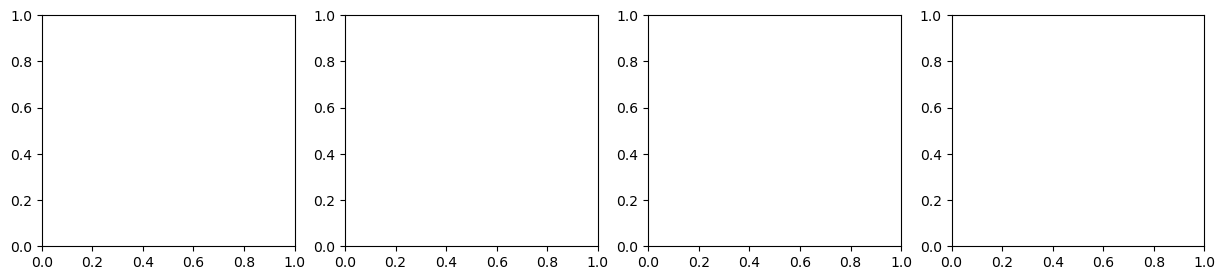

In [31]:
fig, axs = plt.subplots(1,4, figsize=(15,3))
temp_samples = [1, 7, 20, 37]
for temp, ax in zip(temp_samples, axs):
    atom_cols = atom_col_dict[temp]
    kin_e = np.array([atom_col.get_kinetic_energy() for atom_col in atom_cols])
    pot_e = np.array([atom_col.get_potential_energy() for atom_col in atom_cols])
    xs = np.linspace(0, len(pot_e)-1, len(pot_e))
    ax.set_ylim([-20,20])
    ax.plot(xs, kin_e+pot_e)

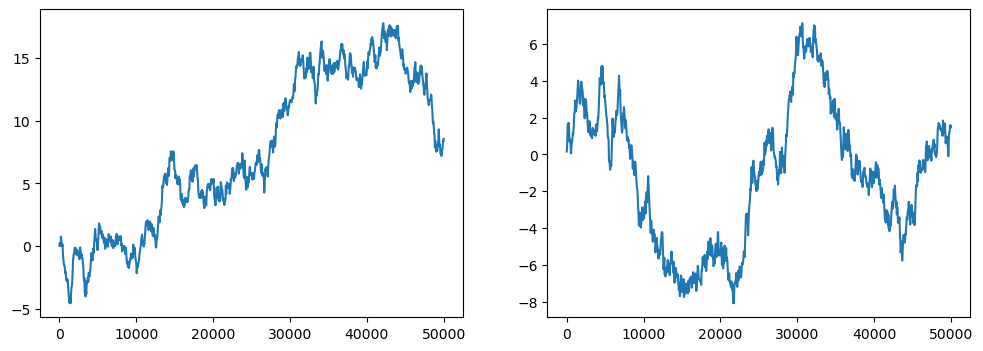

In [63]:
CMs = np.array([np.sum(atom_col.positions*atom_col.masses[:,None],axis=0)/np.sum(atom_col.masses) for atom_col in atom_col_dict[0]])
fig, axs = plt.subplots(1,2, figsize=(12,4))
xs = np.linspace(0, len(CMs), len(CMs))
axs[0].plot(xs, CMs[:,0])
axs[1].plot(xs, CMs[:,1])

In [61]:
print(CMs[:,0])

[1.41389156e-03 2.82778313e-03 4.24167469e-03 ... 7.14224562e+00
 7.14392619e+00 7.14560675e+00]


In [36]:
atom_cols = atom_col_dict[37]

In [49]:
np.sum(atom_cols[900].get_forces(), axis=0)

array([3.88578059e-16, 0.00000000e+00])

In [48]:
atom_cols[0].get_forces()

array([[-5.65359868, -3.34490326],
       [ 8.03138653, -7.22807169],
       [-2.37778785, 10.57297495]])